## Import Transcriptor:

In [1]:
import os
import cv2
from transcriptor import Transcriptor
from matplotlib import pyplot as plt
from ultralytics import YOLO

## Load Yolov8 Model and the Transcriptor:

In [2]:
transcriptor = Transcriptor()
model = YOLO("models/yolov8_h3.pt")

## Transcription:
#### Predict the Bounding Boxes and save them as a List of Tuples as shown bellow:

In [46]:
img_path = "dataset/images/100.png"

In [47]:
def get_bounding_boxes_yolov8(img_path):
    detections = model(img_path)
    confs = detections[0].boxes.conf
    classes = detections[0].boxes.cls
    boxes = detections[0].boxes.xyxy
    conf_thr = 0.0
    bounding_boxes = []
    for elem in zip(boxes, classes, confs):
        top_left = (int(elem[0][0]), int(elem[0][1]))
        bottom_right = (int(elem[0][2]), int(elem[0][3]))
        label = str(int(elem[1]))
        conf = float(elem[2])
        # Convert int value labels to their corresponding classes:
        if label == "10":
            label = "+"
        elif label == "11":
            label = "-"
        elif label == "12":
            label = "="
        elif label == "13":
            label = "c1"
        # Filter low-confidence detections:
        if conf > conf_thr:
            bounding_boxes.append(([top_left, bottom_right], label, conf))
    return bounding_boxes

In [48]:
bounding_boxes = get_bounding_boxes_yolov8(img_path)


image 1/1 /Users/baptistebelescot/Documents/git/HME-VAS/dataset/images/100.png: 320x224 2 2s, 1 4, 1 5, 1 6, 1 7, 1 +, 1 =, 13.4ms
Speed: 0.6ms preprocess, 13.4ms inference, 0.4ms postprocess per image at shape (1, 3, 320, 224)


#### Transcript the results using the Transcriptor:

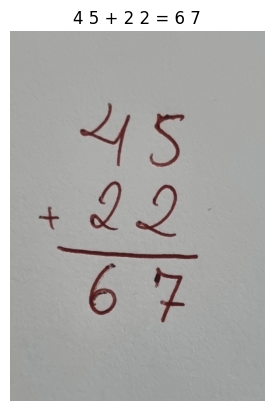

In [49]:
latex = transcriptor(bounding_boxes)
img = cv2.imread(img_path)
plt.imshow(img, cmap='gray')
plt.title(latex)
plt.axis('off')
plt.show()

In [50]:
from IPython.display import display, Math

# Display the LaTeX string
display(Math(latex))


<IPython.core.display.Math object>